In [1]:
from IPython.display import Image

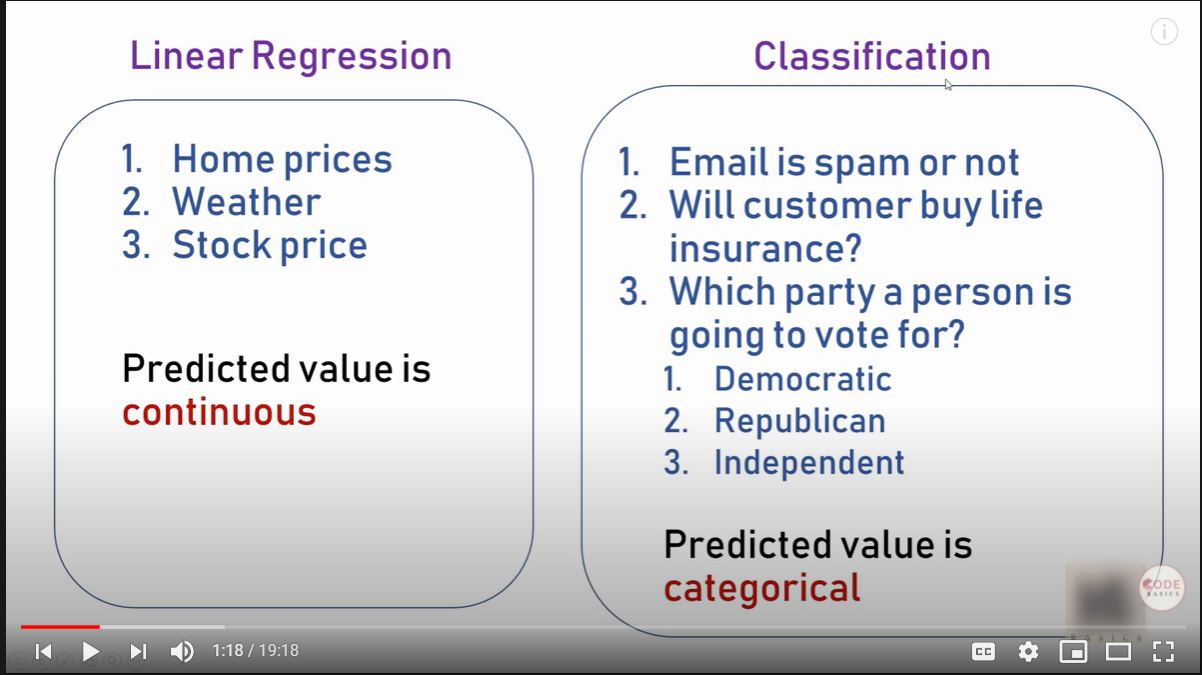

In [2]:
Image(filename="a.png",width=500)

In [3]:
# Logistic Regression is used to predict during classification problems.

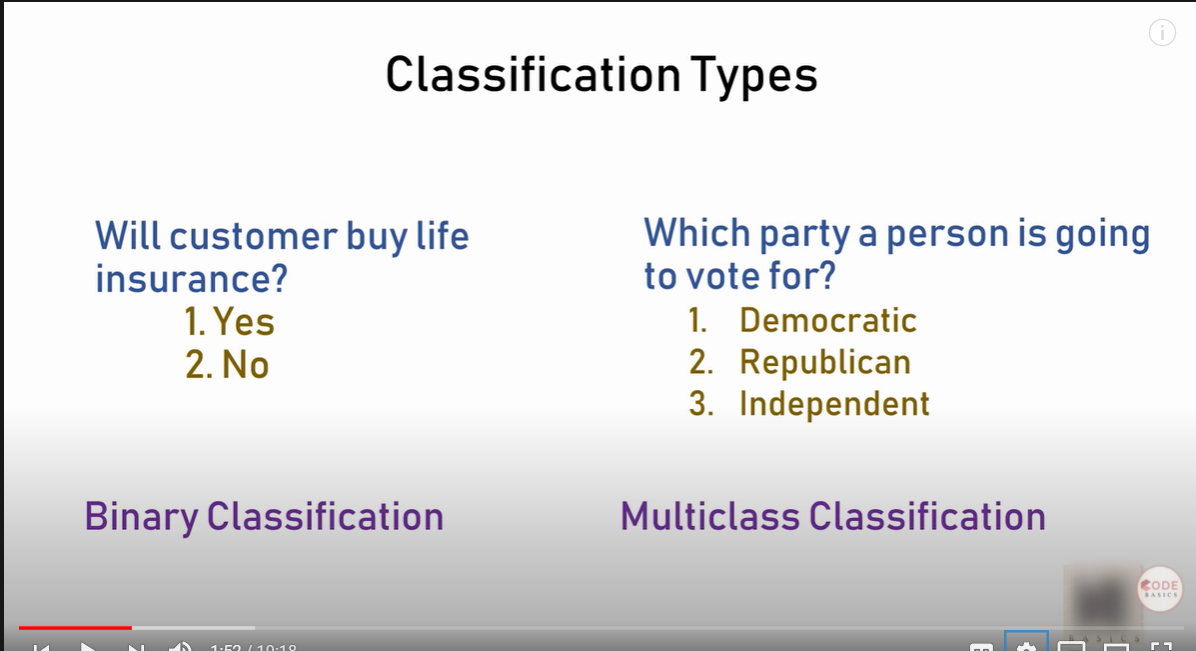

In [4]:
Image("types.png",width=500)

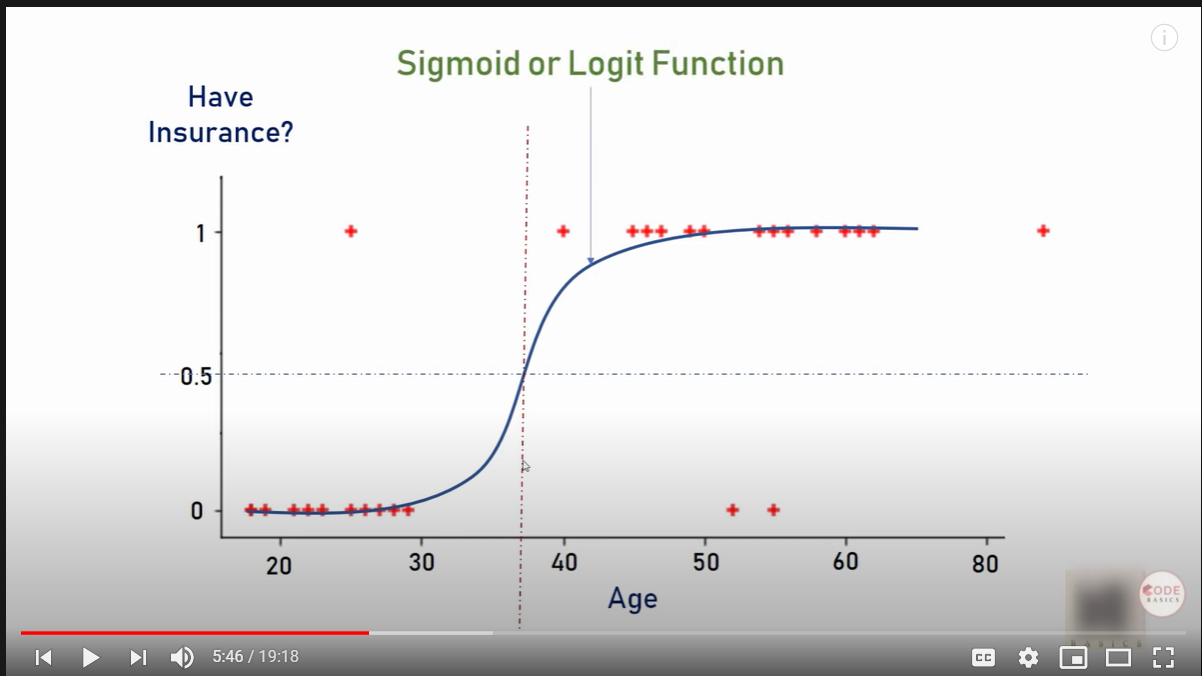

In [5]:
Image("sigmoid.png",width=500)

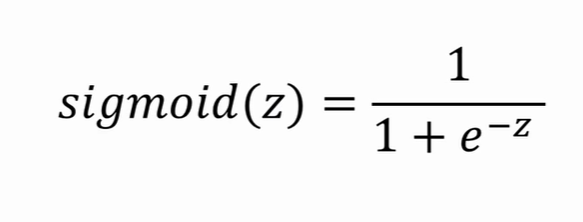

In [6]:
# Sigmoid Function:
Image("func.png")

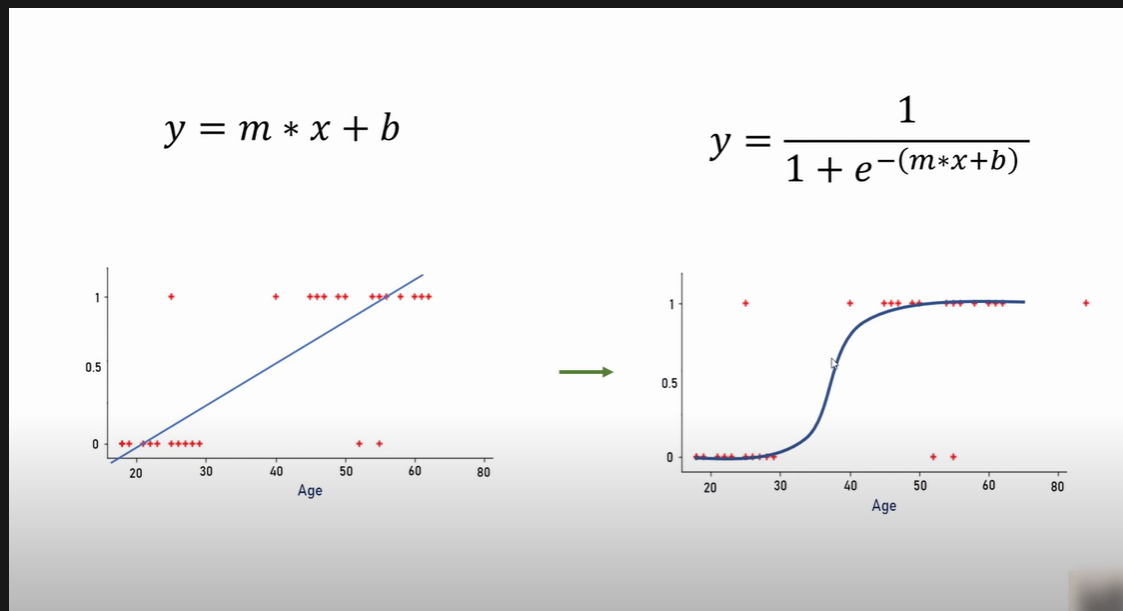

In [7]:
Image("b.png",width=700)

In [8]:
# All you do in logistic regression is that you take the linear equation and feed it into the sigmoid function.

In [9]:
# Since the sigmoid function lies between 0 and 1, logistic regression can classify data based on probability.

In [10]:
# predict_proba(test_data) is used to predict the probability whether it comes from one class or the other.

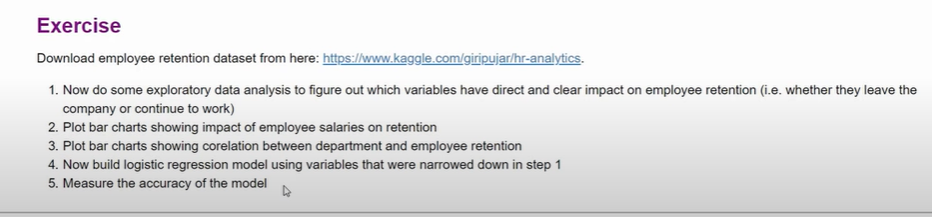

In [11]:
# Questions:
Image("q.png")

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [14]:
df["left"].unique()

array([1, 0], dtype=int64)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df.isnull().sum().sum()

0

In [17]:
# First you must split the data into two parts: Leaving the company or not.

In [18]:
left=df[df['left']==1]
retained=df[df['left']==0]

In [19]:
# Now we will find the best features that may be used.

In [20]:
# You can also use heatmap with cor() method to get the correlation between each column of df.
# For reference,   https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [21]:
# Our aim is to find the reason for people not leaving the company.

In [22]:
retained

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [23]:
df1=pd.DataFrame(data=retained.mean())
df1

,0
satisfaction_level,0.666810
last_evaluation,0.715473
number_project,3.786664
average_montly_hours,199.060203
time_spend_company,3.380032
Work_accident,0.175009
left,0.000000
promotion_last_5years,0.026251


In [24]:
df1["1"]=left.mean()

In [25]:
df1

,0,1
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
left,0.000000,1.000000
promotion_last_5years,0.026251,0.005321


In [26]:
# This conclusion is given using the numeric data. Now we have to give the conclusion using categorical data.

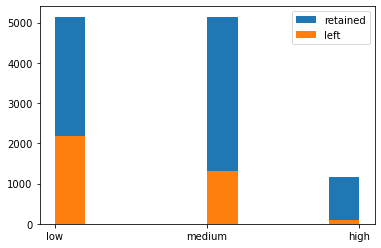

In [27]:
plt.hist(retained["salary"],label="retained")
plt.hist(left["salary"],label="left")
plt.legend()

In [28]:
# You can see that the persons whose salary were high didnot leave the comapny.

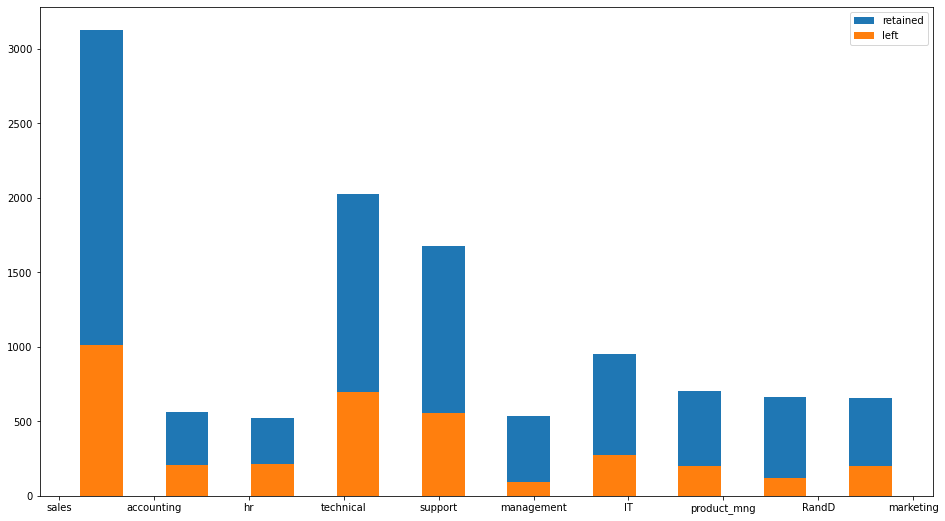

In [29]:
plt.figure(figsize=[16,9])
plt.hist(retained["Department"],label="retained",rwidth=0.5)
plt.hist(left["Department"],label="left",rwidth=0.5)
plt.legend()

In [30]:
# From above chart there seem to be some impact of department on employee retention but it is not major hence
# we will ignore department in our analysis

In [31]:
# Now we need to train our model, before that we will use the get_dummies to split the categorical variables.

In [32]:
X=df.drop(columns="left")
y=df["left"]

In [33]:
X=pd.get_dummies(X)

In [34]:
X.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [35]:
features=pd.DataFrame()
features["satisfaction_level"]=X["satisfaction_level"]
features

,satisfaction_level
0,0.38
1,0.80
2,0.11
3,0.72
4,0.37
...,...
14994,0.40
14995,0.37
14996,0.37
14997,0.11


In [36]:
features["average_montly_hours"]=X["average_montly_hours"]

In [37]:
features["promotion_last_5years"]=X["promotion_last_5years"]

In [38]:
features["salary_high"]=X["salary_high"]

In [39]:
features["salary_medium"]=X["salary_medium"]

In [40]:
features

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
0,0.38,157,0,0,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,0,0
4,0.37,159,0,0,0
...,...,...,...,...,...
14994,0.40,151,0,0,0
14995,0.37,160,0,0,0
14996,0.37,143,0,0,0
14997,0.11,280,0,0,0


In [41]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [42]:
# Now we split the dataset into train and test and then we train the model.

In [43]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test=train_test_split(features,y,test_size=0.2)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression()

In [53]:
lr.fit(X_train, y_train)

LogisticRegression()

In [54]:
lr.score(X_test,y_test)

0.7783333333333333

In [55]:
# Hence our model is 78% accurate.

In [56]:
# Now lets feature scale our model and test its accuracy

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
std=StandardScaler()
std.fit(X_train)
X_train_std=std.transform(X_train)
X_test_std=std.transform(X_test)

In [59]:
lr_std=LogisticRegression()

In [61]:
lr_std.fit(X_train_std, y_train)

LogisticRegression()

In [62]:
lr_std.score(X_test_std, y_test)

0.7786666666666666

In [63]:
# You can see that there is not much improvement in its accuracy and hence feature scaling can be ignored.